In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ararimu = pd.read_csv('../Data/soil data/Ararimu Zanders 647510-20240909095405/ArarimuCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
ararimu.head()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2014-05-29 03:45:00,44.279,9.7,0.0
1,2014-05-29 04:00:00,44.279,9.7,0.0
2,2014-05-29 04:15:00,44.279,9.7,0.0
3,2014-05-29 04:30:00,44.167,9.5,0.0
4,2014-05-29 04:45:00,44.165,9.5,0.0


In [32]:
print('SoilMoisture(%)', ararimu['SoilMoisture(%)'].describe())
print('SoilTemp(c)', ararimu['SoilTemp(c)'].describe())
print('Rain(mm)', ararimu['Rain(mm)'].describe())

SoilMoisture(%) count    323819.000000
mean         46.706777
std           6.495546
min          30.951000
25%          42.275000
50%          48.078000
75%          51.575000
max          69.878000
Name: SoilMoisture(%), dtype: float64
SoilTemp(c) count    323819.000000
mean         16.411819
std           3.929874
min           5.200000
25%          13.100000
50%          16.100000
75%          19.600000
max          29.900000
Name: SoilTemp(c), dtype: float64
Rain(mm) count    323819.000000
mean          0.043598
std           0.302414
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.320000
Name: Rain(mm), dtype: float64


#  Seasonal for soil moisture, soil temperature, and rainfall
- Summer: December to February
- Autumn: March to May
- Winter: June to August
- Spring: September to November

In [33]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]: 
        return 'Autumn'
    elif month in [6, 7, 8]: 
        return 'Winter'
    else:
        return 'Spring'

In [34]:
ararimu['Year'] = ararimu['Timestamp (UTC+12:00)'].dt.year
ararimu['Month'] = ararimu['Timestamp (UTC+12:00)'].dt.month
ararimu['Season'] = ararimu['Month'].apply(get_season)
ararimu.head()


,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm),Year,Month,Season
0,2014-05-29 03:45:00,44.279,9.7,0.0,2014,5,Autumn
1,2014-05-29 04:00:00,44.279,9.7,0.0,2014,5,Autumn
2,2014-05-29 04:15:00,44.279,9.7,0.0,2014,5,Autumn
3,2014-05-29 04:30:00,44.167,9.5,0.0,2014,5,Autumn
4,2014-05-29 04:45:00,44.165,9.5,0.0,2014,5,Autumn


In [35]:
seasonal_means = ararimu.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'mean'
}).reset_index()

print(seasonal_means)


    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2014  Autumn        44.988498    13.030037  0.040806
1   2014  Spring        50.217309    15.851671  0.046385
2   2014  Summer        45.208259    20.385786  0.039079
3   2014  Winter        48.579448    12.145052  0.056776
4   2015  Autumn        40.461243    17.989006  0.040423
5   2015  Spring        44.347605    16.418235  0.028291
6   2015  Summer        35.794239    22.486146  0.011966
7   2015  Winter        46.280390    11.560168  0.040702
8   2016  Autumn        41.813313    18.433718  0.033273
9   2016  Spring        49.877457    16.450618  0.050679
10  2016  Summer        39.668057    22.406914  0.027564
11  2016  Winter        50.365269    12.555605  0.055941
12  2017  Autumn        47.920966    17.858979  0.067096
13  2017  Spring        46.884082    18.751444  0.021370
14  2017  Summer        36.681551    22.419575  0.021455
15  2017  Winter        52.988551    11.791358  0.062887
16  2018  Autumn        49.8058

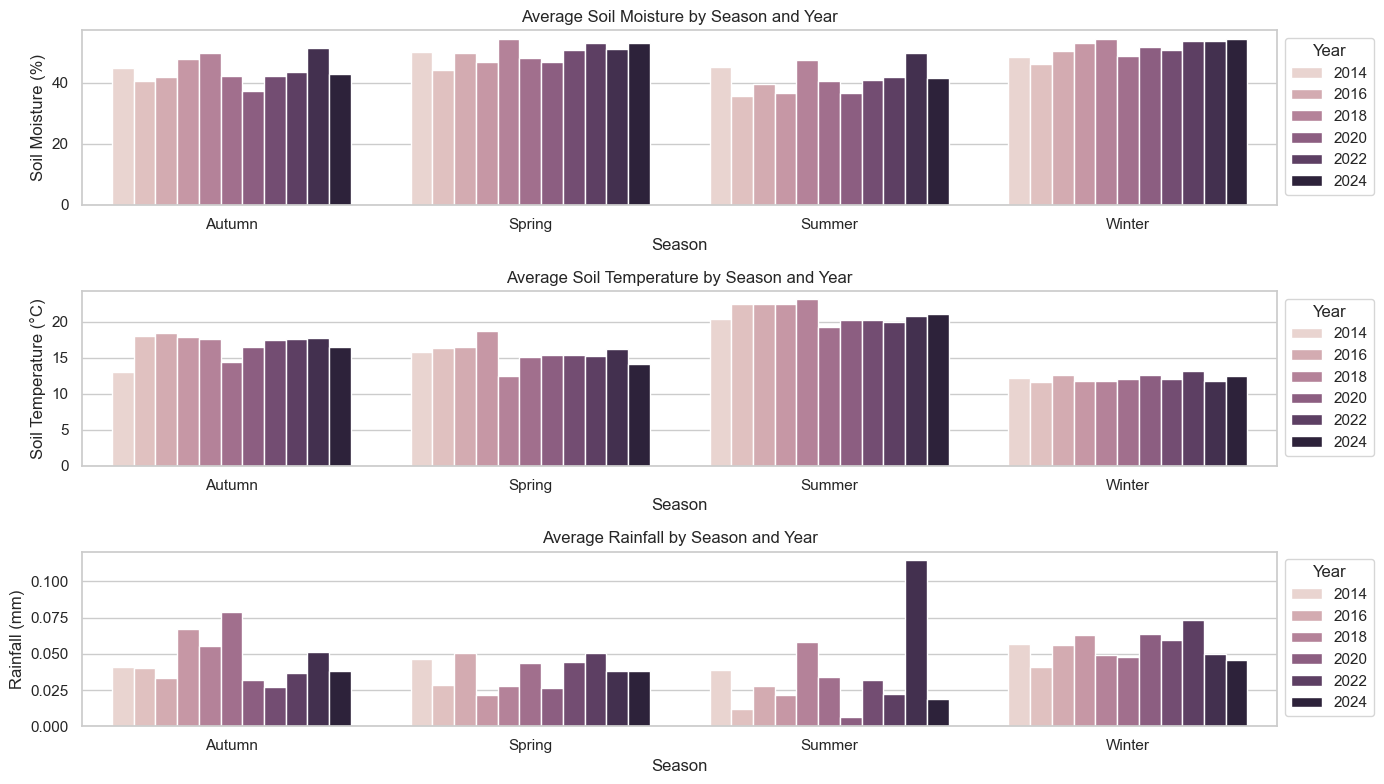

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a bar plot for each variable
plt.figure(figsize=(14, 8))

# Soil Moisture
plt.subplot(3, 1, 1)
sns.barplot(x='Season', y='SoilMoisture(%)', hue='Year', data=seasonal_means)
plt.title('Average Soil Moisture by Season and Year')
plt.ylabel('Soil Moisture (%)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Soil Temperature
plt.subplot(3, 1, 2)
sns.barplot(x='Season', y='SoilTemp(c)', hue='Year', data=seasonal_means)
plt.title('Average Soil Temperature by Season and Year')
plt.ylabel('Soil Temperature (°C)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Rainfall
plt.subplot(3, 1, 3)
sns.barplot(x='Season', y='Rain(mm)', hue='Year', data=seasonal_means)
plt.title('Average Rainfall by Season and Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


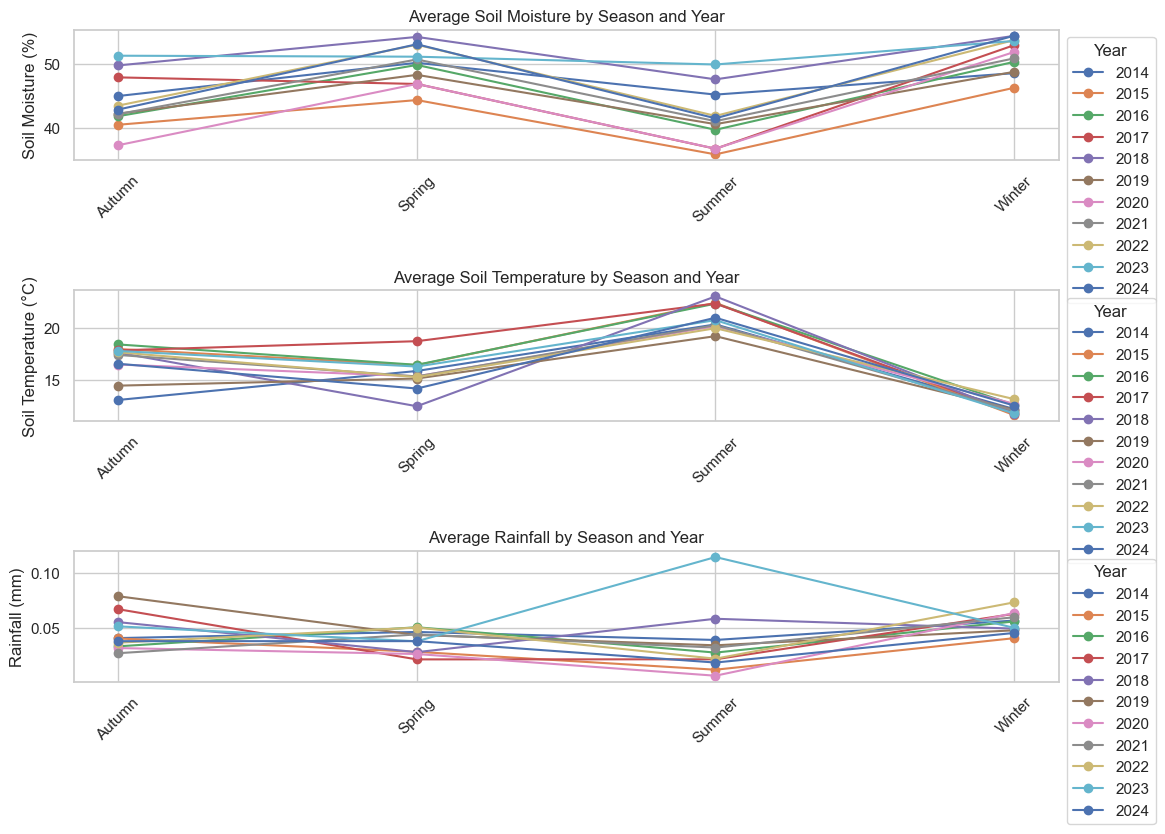

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a figure for the line plots
plt.figure(figsize=(14, 8))

# Plot Soil Moisture
plt.subplot(3, 1, 1)
for year in seasonal_means['Year'].unique():
    subset = seasonal_means[seasonal_means['Year'] == year]
    plt.plot(subset['Season'], subset['SoilMoisture(%)'], marker='o', label=year)

plt.title('Average Soil Moisture by Season and Year')
plt.ylabel('Soil Moisture (%)')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Plot Soil Temperature
plt.subplot(3, 1, 2)
for year in seasonal_means['Year'].unique():
    subset = seasonal_means[seasonal_means['Year'] == year]
    plt.plot(subset['Season'], subset['SoilTemp(c)'], marker='o', label=year)

plt.title('Average Soil Temperature by Season and Year')
plt.ylabel('Soil Temperature (°C)')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Plot Rainfall
plt.subplot(3, 1, 3)
for year in seasonal_means['Year'].unique():
    subset = seasonal_means[seasonal_means['Year'] == year]
    plt.plot(subset['Season'], subset['Rain(mm)'], marker='o', label=year)

plt.title('Average Rainfall by Season and Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Space for the legend
plt.show()


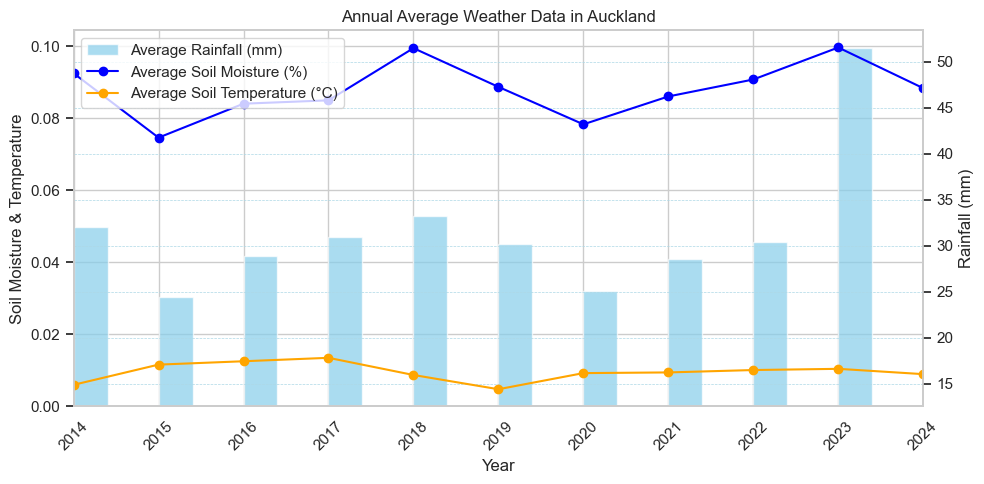

In [38]:
mean_values = ararimu.groupby('Year').agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'mean'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))


# Create a secondary y-axis for Rain
rain_hist = ax1.hist(mean_values['Year'], weights=mean_values['Rain(mm)'], bins=len(mean_values['Year'])-1, alpha=0.7, color='skyblue',  width=0.4, align='mid', label='Average Rainfall (mm)')

# Plot Soil Moisture and Temperature
ax2 = ax1.twinx()
soil_moisture_line = mean_values.plot(x='Year', y='SoilMoisture(%)', ax=ax2, color='blue', label='Average Soil Moisture (%)', alpha=1, marker="o")
soil_temp_line = mean_values.plot(x='Year', y='SoilTemp(c)', ax=ax2, color='orange', label='Average Soil Temperature (°C)', alpha=1, marker="o")

ax1.set_xlim(mean_values['Year'].min(), mean_values['Year'].max())
ax1.set_xticks(mean_values['Year'])
ax1.set_xticklabels(mean_values['Year'], rotation=45)

# Set labels and titles
ax1.set_xlabel('Year')
ax1.set_ylabel('Soil Moisture & Temperature')
ax2.set_ylabel('Rainfall (mm)')
plt.title('Annual Average Weather Data in Auckland')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(color = 'lightblue', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

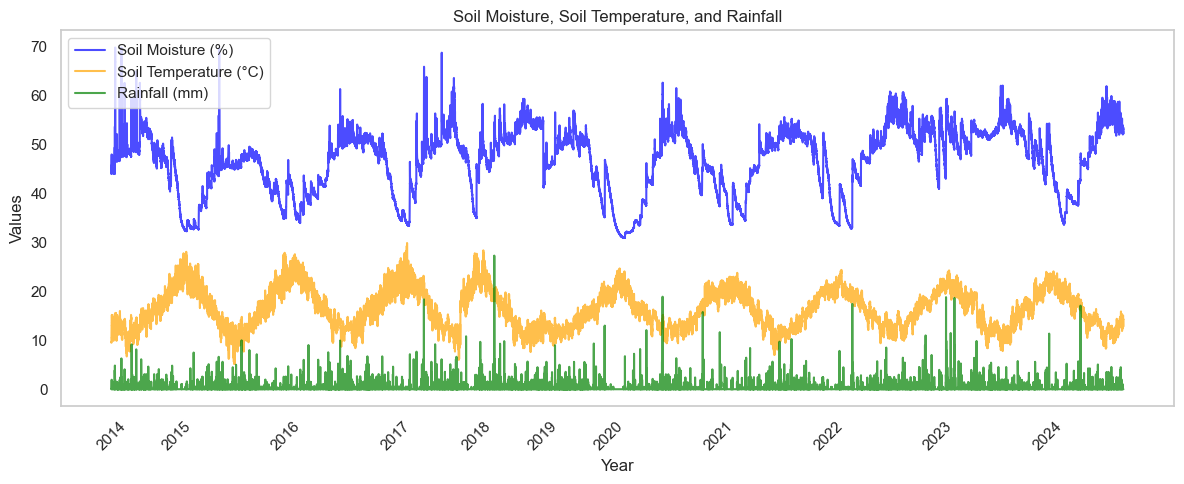

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
data_to_plot = ararimu[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)', 'Year']]


data_to_plot['SoilMoisture(%)'].plot(ax=ax, color='blue', label='Soil Moisture (%)', alpha=0.7)
ararimu['SoilTemp(c)'].plot(ax=ax, color='orange', label='Soil Temperature (°C)', alpha=0.7)
ararimu['Rain(mm)'].plot(ax=ax, color='green', label='Rainfall (mm)', alpha=0.7)

year_starts = ararimu.groupby('Year').head(1).index
years = ararimu['Year'].unique()  # Get unique years
ax.set_xticks(year_starts)  # Set x-ticks for each year
ax.set_xticklabels(years, rotation=45)  # Set the year labels

ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')


ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')

ax.legend()

plt.grid()
plt.tight_layout()
plt.show()


In [40]:
ararimu.describe()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm),Year,Month
count,323819,323819.000000,323819.000000,323819.000000,323819.000000,323819.000000
mean,2019-08-26 20:03:40.909520384,46.706777,16.411819,0.043598,2019.151810,6.512765
min,2014-05-29 03:45:00,30.951000,5.200000,0.000000,2014.000000,1.000000
25%,2016-09-18 10:22:30,42.275000,13.100000,0.000000,2016.000000,4.000000
50%,2020-01-28 06:45:00,48.078000,16.100000,0.000000,2020.000000,7.000000
75%,2022-05-20 13:22:30,51.575000,19.600000,0.000000,2022.000000,9.000000
max,2024-09-09 21:30:00,69.878000,29.900000,27.320000,2024.000000,12.000000
std,NaN,6.495546,3.929874,0.302414,3.130177,3.343698


In [41]:
print(ararimu.dtypes)


Timestamp (UTC+12:00)    datetime64[ns]
SoilMoisture(%)                 float64
SoilTemp(c)                     float64
Rain(mm)                        float64
Year                              int32
Month                             int32
Season                           object
dtype: object


# Mean

In [42]:
averageSoilMoisture = ararimu['SoilMoisture(%)'].mean()
averageSoilTemperature = ararimu['SoilTemp(c)'].mean()
averageRain = ararimu['Rain(mm)'].mean()
print('Average in Ararime from 2014 to 2024')
print('Average Soil Moisture Ararimu: ', averageSoilMoisture, '\nAverage Soil Temperature Ararimu:',averageSoilTemperature , '\nAverage Rain Ararimu: ', averageRain)



Average in Ararime from 2014 to 2024
Average Soil Moisture Ararimu:  46.70677711537069 
Average Soil Temperature Ararimu: 16.41181877427411 
Average Rain Ararimu:  0.043597565306544704


In [43]:
# Calculate mean values grouped by Year and Season

mean_values = ararimu.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'mean'
}).reset_index()
print(mean_values)

    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2014  Autumn        44.988498    13.030037  0.040806
1   2014  Spring        50.217309    15.851671  0.046385
2   2014  Summer        45.208259    20.385786  0.039079
3   2014  Winter        48.579448    12.145052  0.056776
4   2015  Autumn        40.461243    17.989006  0.040423
5   2015  Spring        44.347605    16.418235  0.028291
6   2015  Summer        35.794239    22.486146  0.011966
7   2015  Winter        46.280390    11.560168  0.040702
8   2016  Autumn        41.813313    18.433718  0.033273
9   2016  Spring        49.877457    16.450618  0.050679
10  2016  Summer        39.668057    22.406914  0.027564
11  2016  Winter        50.365269    12.555605  0.055941
12  2017  Autumn        47.920966    17.858979  0.067096
13  2017  Spring        46.884082    18.751444  0.021370
14  2017  Summer        36.681551    22.419575  0.021455
15  2017  Winter        52.988551    11.791358  0.062887
16  2018  Autumn        49.8058

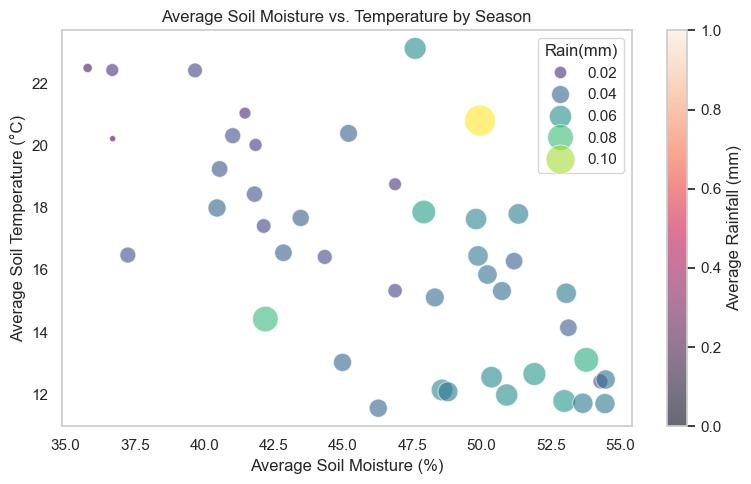

In [44]:
import seaborn as sns

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=mean_values,
    x='SoilMoisture(%)',
    y='SoilTemp(c)',
    size='Rain(mm)',
    sizes=(20, 500),  # Set the range for the marker sizes
    hue='Rain(mm)',  # Color based on rainfall
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)

plt.colorbar(scatter.collections[0], label='Average Rainfall (mm)')

# Set labels and title
plt.xlabel('Average Soil Moisture (%)')
plt.ylabel('Average Soil Temperature (°C)')
plt.title('Average Soil Moisture vs. Temperature by Season')

plt.grid()
plt.tight_layout()
plt.show()

# Median


In [45]:
medianSoilMoisture = ararimu['SoilMoisture(%)'].median()
medianSoilTemperature = ararimu['SoilTemp(c)'].median()
medianRain = ararimu['Rain(mm)'].median()
print('The mid point in Ararime from 2014 to 2024')
print('Median Soil Moisture Ararimu: ', medianSoilMoisture, '\nMedian Soil Temperature Ararimu:',medianSoilTemperature , '\nMedian Rain Ararimu: ', medianRain)


The mid point in Ararime from 2014 to 2024
Median Soil Moisture Ararimu:  48.078 
Median Soil Temperature Ararimu: 16.1 
Median Rain Ararimu:  0.0


# Mode
The most common value

In [46]:
modeSoilMoisture = ararimu['SoilMoisture(%)'].mode()
modeSoilTemperature = ararimu['SoilTemp(c)'].mode()
modeRain = ararimu['Rain(mm)'].mode()
print('The mid point in Ararime from 2014 to 2024')
print('Mode Soil Moisture Ararimu: ', modeSoilMoisture, '\nMode Soil Temperature Ararimu:',modeSoilTemperature , '\nMode Rain Ararimu: ', modeRain)


The mid point in Ararime from 2014 to 2024
Mode Soil Moisture Ararimu:  0    34.153
Name: SoilMoisture(%), dtype: float64 
Mode Soil Temperature Ararimu: 0    11.9
Name: SoilTemp(c), dtype: float64 
Mode Rain Ararimu:  0    0.0
Name: Rain(mm), dtype: float64


# Standard Deviation
- Standard deviation is a number that describes how spread out the values are.
- A low standard deviation means that most of the numbers are close to the mean (average) value.
- A high standard deviation means that the values are spread out over a wider range.

In [47]:
StdSoilMoisture = ararimu['SoilMoisture(%)'].std()
StdSoilTemperature = ararimu['SoilTemp(c)'].std()
StdRain = ararimu['Rain(mm)'].std()
print('The Standard Deviation in Ararime from 2014 to 2024')
print('The Standard Deviation of Soil Moisture Ararimu: ', StdSoilMoisture, '\nThe Standard Deviation of Soil Temperature Ararimu:', StdSoilTemperature , '\nThe Standard Deviation of Rain Ararimu: ', StdRain)

The Standard Deviation in Ararime from 2014 to 2024
The Standard Deviation of Soil Moisture Ararimu:  6.495545536281463 
The Standard Deviation of Soil Temperature Ararimu: 3.929873725930078 
The Standard Deviation of Rain Ararimu:  0.30241443181865374


- In agricultural or ecological contexts, changes of 5-10% in soil moisture could significantly impact plant health, water availability, and drought tolerance. when soil moisture changes by more than 6.5% from the average, it may lead to stress conditions for vegetation or crops, especially in sensitive ecosystems.

-  3-4°C in soil temperature can have a noticeable impact, particularly for species adapted to narrower temperature ranges.

- Small fluctuations in rainfall may not seem impactful in day-to-day measurements, but in the long term, these small deviations accumulate and can influence soil moisture balance, runoff, and recharge of groundwater.

In [48]:
print('SoilMoisture(%)', ararimu['SoilMoisture(%)'].describe())
print('SoilTemp(c)', ararimu['SoilTemp(c)'].describe())
print('Rain(mm)', ararimu['Rain(mm)'].describe())

SoilMoisture(%) count    323819.000000
mean         46.706777
std           6.495546
min          30.951000
25%          42.275000
50%          48.078000
75%          51.575000
max          69.878000
Name: SoilMoisture(%), dtype: float64
SoilTemp(c) count    323819.000000
mean         16.411819
std           3.929874
min           5.200000
25%          13.100000
50%          16.100000
75%          19.600000
max          29.900000
Name: SoilTemp(c), dtype: float64
Rain(mm) count    323819.000000
mean          0.043598
std           0.302414
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.320000
Name: Rain(mm), dtype: float64


In [49]:
ararimu.describe()

,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm),Year,Month
count,323819,323819.000000,323819.000000,323819.000000,323819.000000,323819.000000
mean,2019-08-26 20:03:40.909520384,46.706777,16.411819,0.043598,2019.151810,6.512765
min,2014-05-29 03:45:00,30.951000,5.200000,0.000000,2014.000000,1.000000
25%,2016-09-18 10:22:30,42.275000,13.100000,0.000000,2016.000000,4.000000
50%,2020-01-28 06:45:00,48.078000,16.100000,0.000000,2020.000000,7.000000
75%,2022-05-20 13:22:30,51.575000,19.600000,0.000000,2022.000000,9.000000
max,2024-09-09 21:30:00,69.878000,29.900000,27.320000,2024.000000,12.000000
std,NaN,6.495546,3.929874,0.302414,3.130177,3.343698


Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting